Install

In [2]:
pip install tensorflow matplotlib scikit-learn seaborn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Libraries

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


Directories and Image Parameter

In [4]:
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/val'
test_data_dir = 'dataset/test'
img_width, img_height = 224, 224
batch_size = 16


Data Generators

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


Prepare Data

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 1695 images belonging to 9 classes.
Found 210 images belonging to 9 classes.
Found 215 images belonging to 9 classes.


Define Model

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Checkpoint

In [9]:
checkpoint = ModelCheckpoint('rice_classifier_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


Train

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[checkpoint]
)


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.1404 - loss: 2.1966 - val_accuracy: 0.1490 - val_loss: 2.1509
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0625 - loss: 2.2608 - val_accuracy: 0.0000e+00 - val_loss: 2.2336
Epoch 3/50


c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


105/105 ━━━━━━━━━━━━━━━━━━━━ 288s 3s/step - accuracy: 0.2099 - loss: 2.0525 - val_accuracy: 0.4183 - val_loss: 1.5573
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3750 - loss: 1.5747 - val_accuracy: 0.5000 - val_loss: 1.0801
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.4039 - loss: 1.5020 - val_accuracy: 0.4615 - val_loss: 1.4266
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.3750 - loss: 1.4676 - val_accuracy: 0.0000e+00 - val_loss: 1.9096
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.4713 - loss: 1.3399 - val_accuracy: 0.4760 - val_loss: 1.2530
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3125 - loss: 1.7244 - val_accuracy: 1.0000 - val_loss: 0.2411
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.5134 - loss: 1.2019 - val_accuracy: 0.4856 - val_loss: 1.2394
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.5000 - loss: 1.2729 - val_accuracy: 

Save Model

In [12]:
model.save('rice_classifier_model.keras')


Evaluate

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.7599 - loss: 0.6070
Test accuracy: 0.7534883618354797


Plot Training and Validation Accuracy

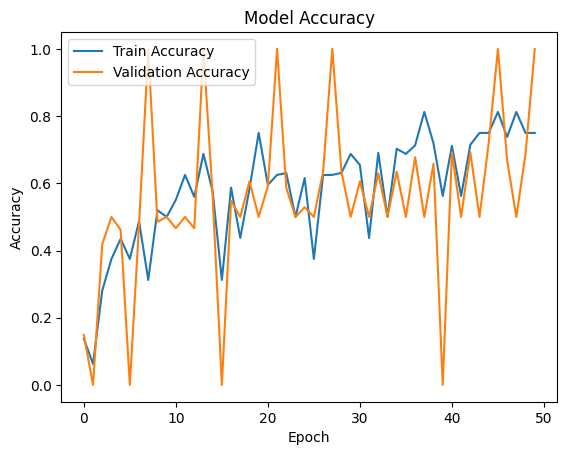

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Plot Training and Validation Loss

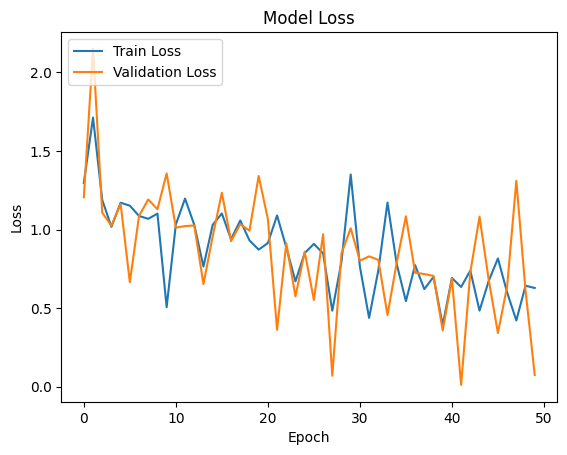

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Visuals

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


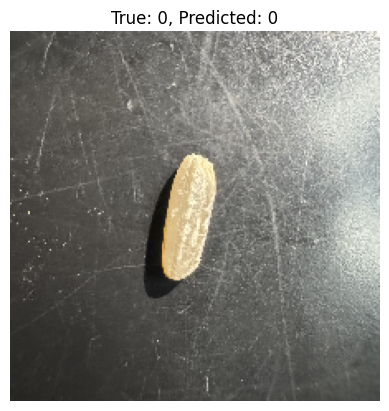

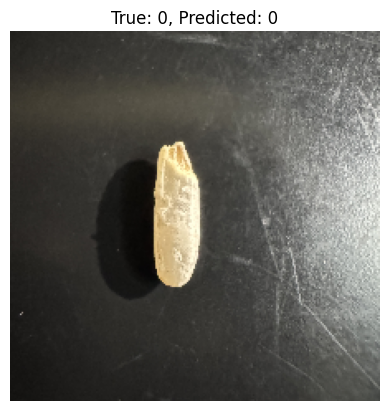

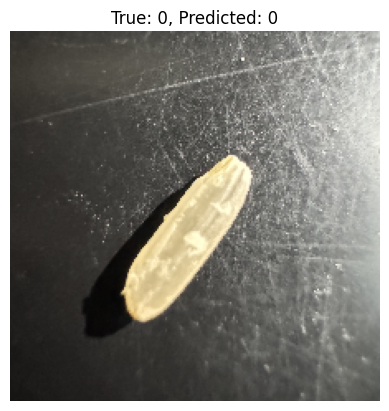

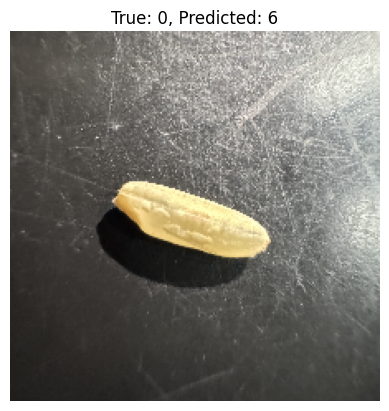

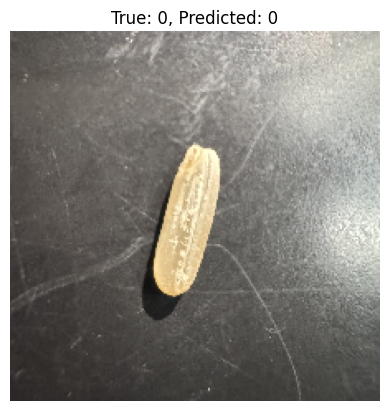

In [15]:
x_test, y_test = next(test_generator)

# Make predictions
predictions = model.predict(x_test)

# Plot the images along with the predicted and true labels
for i in range(5):  # Display 5 images
    plt.imshow(x_test[i])
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


Confusion Matrix

14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step


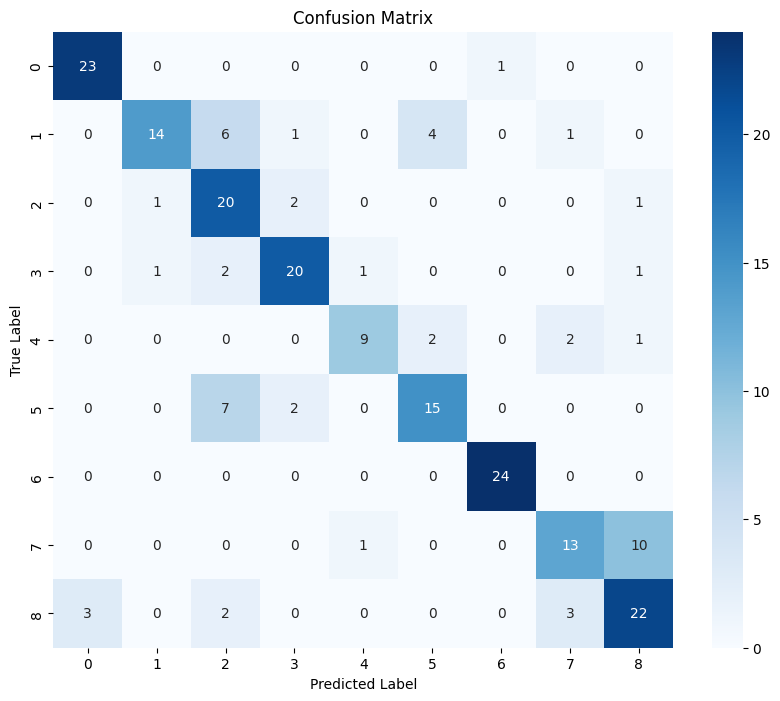

In [16]:
# Cell 14: Confusion Matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
